In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Plot the confusion matrix
def plot_conf_matrix(conf_matrix, fmt, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt=fmt, cmap="RdYlGn", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

In [3]:
# Load the dataset
file_path = '../combined_training_data_01.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

def extract_mv(data_raw):
    # Add Characteristic for Mean and Variance
    window_size = 20
    # Calculate the rolling mean and standard deviation for each feature
    data_raw['delta3_1_mean'] = data_raw['delta3_1'].rolling(window=window_size).mean()
    data_raw['delta3_1_std'] = data_raw['delta3_1'].rolling(window=window_size).std()
    data_raw['delta3_2_mean'] = data_raw['delta3_2'].rolling(window=window_size).mean()
    data_raw['delta3_2_std'] = data_raw['delta3_2'].rolling(window=window_size).std()
    data_raw['delta2_1_mean'] = data_raw['delta2_1'].rolling(window=window_size).mean()
    data_raw['delta2_1_std'] = data_raw['delta2_1'].rolling(window=window_size).std()
    # Drop any rows with NaN values resulting from the rolling operation
    data_raw = data_raw.dropna()
    # Split the data into features and labels
    X = data_raw[['delta3_1', 'delta3_2', 'delta2_1',
              'delta3_1_mean', 'delta3_2_mean', 'delta2_1_mean',
              'delta3_1_std', 'delta3_2_std', 'delta2_1_std']]
    y = data_raw['label']
    
    return data_raw, X, y


data, X, _ = extract_mv(data)
y = data['label'].values

# print(activity_features)
# Encode labels: Transform categorical labels into numerical values.
label_encoder = LabelEncoder()
# Fit: extract unique classes from dataset Transform: converts the labels to numerical values.
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
num_estimators = 200
rand_state = 42
clf = RandomForestClassifier(n_estimators=num_estimators, random_state=rand_state)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print(f"Accuracy:{accuracy_score(y_test, y_pred)*100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Save the model for future use
joblib.dump(clf, 'activity_classifier_MV.pkl')

Accuracy:96.65%
Classification Report:
              precision    recall  f1-score   support

         lay       0.99      1.00      1.00      1291
     lay_sit       0.99      0.86      0.92       170
   lay_stand       0.96      0.83      0.89       208
         sit       0.96      0.99      0.98      2805
     sit_lay       0.97      0.97      0.97        35
   sit_stand       0.95      0.74      0.83       244
       stand       0.97      0.98      0.97      3589
   stand_lay       0.97      0.92      0.94       518
   stand_sit       0.94      0.85      0.90       295

    accuracy                           0.97      9155
   macro avg       0.97      0.90      0.93      9155
weighted avg       0.97      0.97      0.97      9155



['activity_classifier_MV.pkl']

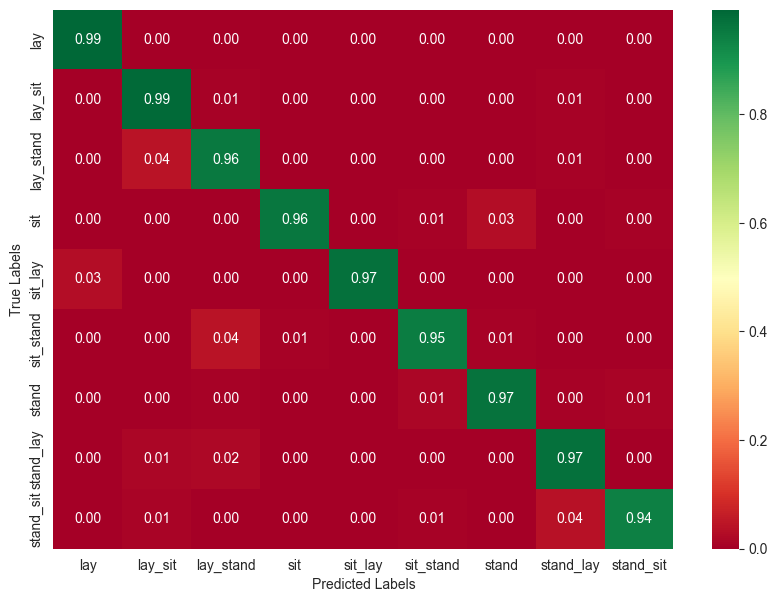

In [8]:
# Plot the confusion matrix
def plot_conf_matrix(conf_matrix, fmt, title):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt=fmt, cmap="RdYlGn", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    #plt.title(title)
    plt.show()

# Generate the confusion matrix
cm = confusion_matrix(y_pred, y_test)

# Normalize the values along rows
row_sums = cm.sum(axis=1, keepdims=True)
# column_sums = cm.sum(axis=1, keepdims=True)
cm_normalized = cm.astype('float') / np.where(row_sums != 0, row_sums, 1)

# Handle zero cases
cm_normalized[np.isnan(cm_normalized)] = 0

plot_conf_matrix(cm_normalized, ".2f", ' Normalized Confusion Matrix for Random Forest with Raw Data, Mean and Variance (Test Set)')

In [5]:
'''
This is used to classify unlabeled data
'''
# Load the saved model
clf = joblib.load('activity_classifier_MV.pkl')

# Load the new data
new_data_path = '../combined_training_data_01.csv'  # Replace with the actual file path
new_data = pd.read_csv(new_data_path)

new_data, X_new, y = extract_mv(new_data)

# Predict the labels for the new data
predicted_labels = clf.predict(X_new)

# Decode the label names
predicted_labels_names = label_encoder.inverse_transform(predicted_labels)

# Add the predicted labels to the new data
new_data['predicted_label'] = predicted_labels_names

# Save the new data with predictions
# new_data.to_csv('labeled_data_with_predictions_RF_MV.csv', index=False)

print("Predictions have been added to the new data and saved to 'labeled_data_with_predictions_RF_MV.csv'")

Predictions have been added to the new data and saved to 'labeled_data_with_predictions_RF_MV.csv'


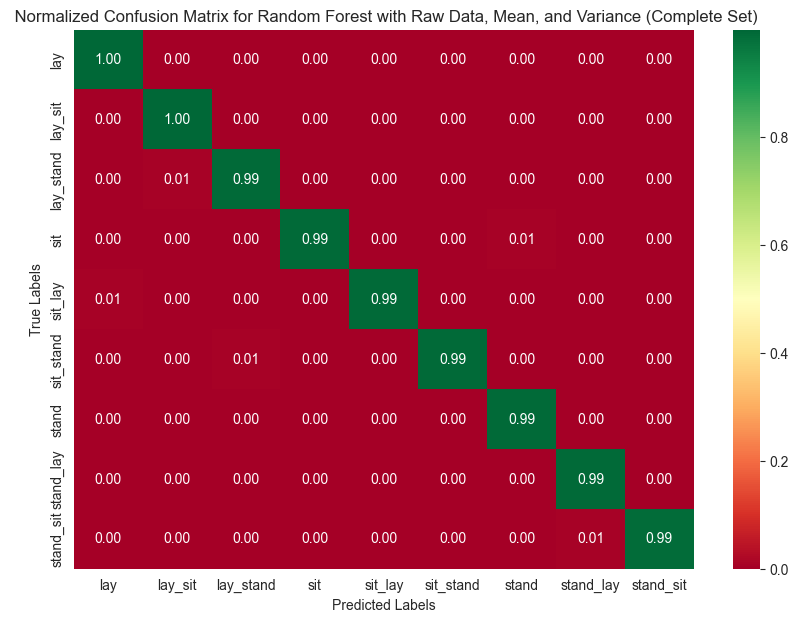

In [6]:
# Generate the confusion matrix
cm = confusion_matrix(new_data['predicted_label'], new_data['label'])

# Normalize the values along rows
row_sums = cm.sum(axis=1, keepdims=True)
# column_sums = cm.sum(axis=1, keepdims=True)
cm_normalized = cm.astype('float') / np.where(row_sums != 0, row_sums, 1)

# Handle zero cases
cm_normalized[np.isnan(cm_normalized)] = 0

# plot_conf_matrix(cm, 'd', 'Confusion Matrix for Random Forest with Raw Data, Mean, and Variance')
plot_conf_matrix(cm_normalized, ".2f", ' Normalized Confusion Matrix for Random Forest with Raw Data, Mean, and Variance (Complete Set)')


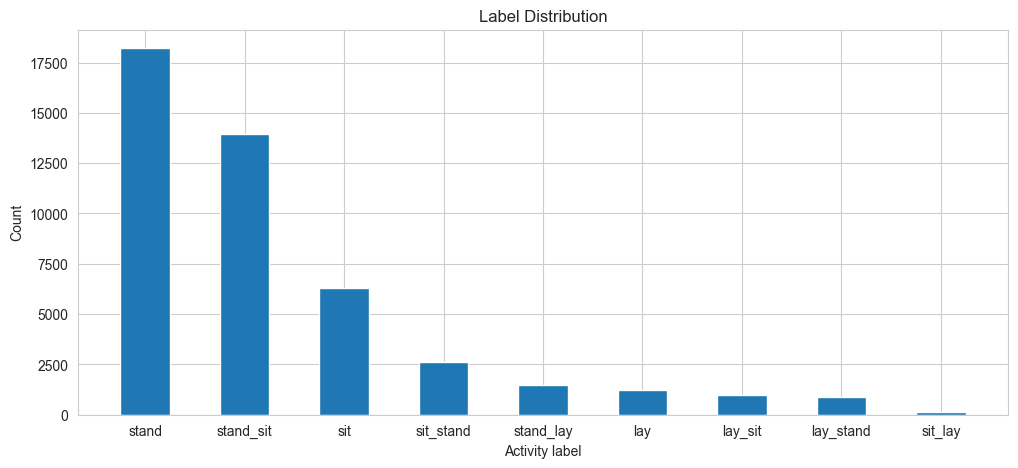

In [7]:
unique_labels = new_data['label'].unique()
# print(unique_labels)

value_counts_labels = new_data['label'].value_counts()
# print(value_counts_labels)

# plot the label counts over all activities, using x and y axes:
def plot_stats(labels, label_count):
  plt.figure(figsize=(12, 5))
  plt.bar(labels, label_count, width=0.5)
  plt.xlabel('Activity label')
  plt.ylabel('Count')
  plt.title('Label Distribution')
  plt.show()

plot_stats(unique_labels, value_counts_labels)
